## CODECADEMY NBA TRENDS PROJECT 


In [1]:
# This is an analysis of the NBA trends data which has original data from the original Basketball reference 

In [4]:
# import the required libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Making the oupts look much better
np.set_printoptions(suppress = True, precision = 2)

In [85]:
# import the dataset
nba = pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Documents\\Desktop\\CODECADEMY\\PYTHON PROJECTS INSTRUCTIONS\\Codecademy_NBA_Trends_Project\\Codecademy_NBA_Trends_Project\\nba_games.csv")
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [90]:
#renaming the columns
nba.rename(columns = {"game_id":"Game ID","year_id": "Year","fran_id":"Fran","game_location":"game_Location"}, inplace = True)

In [91]:
nba.head()

,Game ID,Year,Fran,opp_fran,Game_Location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [92]:
nba.describe()

,Year,is_playoffs,pts,opp_pts,forecast,point_diff
count,24359.000000,24359.000000,24359.000000,24359.000000,24359.000000,24359.000000
mean,1986.916581,0.077754,103.384663,102.438154,0.527805,0.946508
std,17.427172,0.267789,14.724792,14.812181,0.213054,13.341020
min,1947.000000,0.000000,43.000000,38.000000,0.024271,-62.000000
25%,1974.000000,0.000000,94.000000,93.000000,0.359191,-8.000000
50%,1988.000000,0.000000,103.000000,102.000000,0.533177,2.000000
75%,2002.000000,0.000000,113.000000,112.000000,0.698763,10.000000
max,2015.000000,1.000000,173.000000,176.000000,0.976221,56.000000


In [94]:
# Subsetting the data to 2010 season, 2014 season
nba_2010 = nba[nba.Year == 2010]
nba_2014 = nba[nba.Year == 2014]

In [95]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game ID        24359 non-null  object 
 1   Year           24359 non-null  int64  
 2   Fran           24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   Game_Location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


In [96]:
print(nba_2010)
print(nba_2014)

            Game ID  Year     Fran      opp_fran Game_Location  is_playoffs  \
21717  200910270CLE  2010  Celtics     Cavaliers             A            0   
21718  200910280BOS  2010  Celtics       Hornets             H            0   
21719  200910280MIA  2010   Knicks          Heat             A            0   
21720  200910280MIN  2010     Nets  Timberwolves             A            0   
21721  200910280OKC  2010  Thunder         Kings             H            0   
...             ...   ...      ...           ...           ...          ...   
22162  201006080BOS  2010  Celtics        Lakers             H            1   
22163  201006100BOS  2010  Celtics        Lakers             H            1   
22164  201006130BOS  2010  Celtics        Lakers             H            1   
22165  201006150LAL  2010  Celtics        Lakers             A            1   
22166  201006170LAL  2010  Celtics        Lakers             A            1   

       pts  opp_pts game_result  forecast  point_di

In [97]:
# Creating a series called knick_pts(fran_id = "Knicks") 
# knick_pts represents the points team called knick has scored in their games
knick_pts = nba_2010[nba_2010.Fran == "Knicks"]["pts"]
knick_pts

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64

In [98]:
# Creating a series called nets_pts(fran_id = "nets_id") 
# nets_id represents the points team called nets has scored in their games
nets_id = nba_2010[nba_2010.Fran == "Nets"]["pts"]
nets_id

21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64

In [99]:
# Finding the difference between the two teams` average and saving the value as difference in the means
diff_in_means = knick_pts.mean() - nets_id.mean()
diff_in_means

9.731707317073173

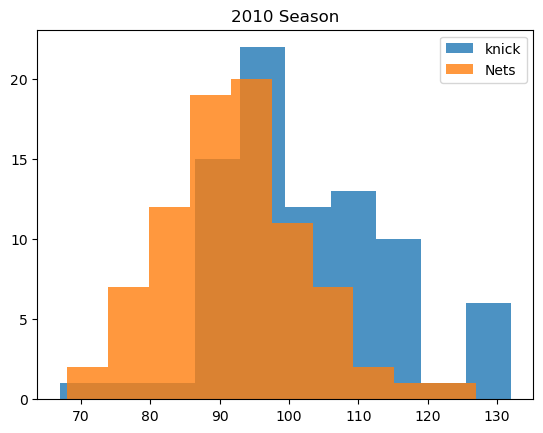

In [100]:
# Making a histogram to compare the points
plt.hist(knick_pts, alpha = 0.8, label = "knick")
plt.hist(nets_id, alpha = 0.8, label = "Nets")
plt.legend()
plt.title("2010 Season")
plt.show()

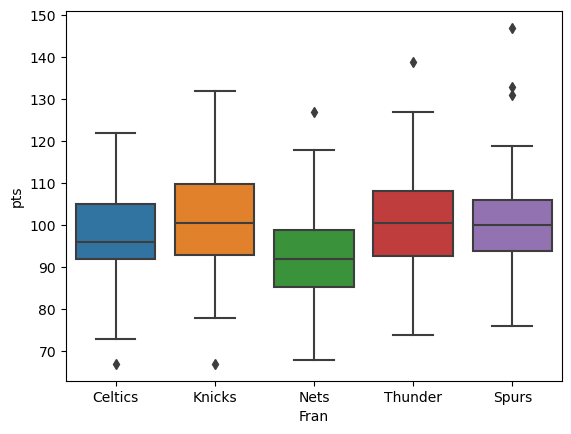

In [101]:
sns.boxplot(data = nba_2010, x = "Fran", y = "pts")
plt.show()

In [109]:
# Checking if a team tends to win games away from home or at home
# Creating crosstabs
location_result_freq = pd.crosstab(nba_2010.Game_Location, nba_2010.game_result)
location_result_freq

game_result,L,W
Game_Location,,
A,133,92
H,105,120


In [108]:
crosstabs?

Object `crosstabs` not found.


In [104]:
nba_2010

,Game ID,Year,Fran,opp_fran,Game_Location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13
...,...,...,...,...,...,...,...,...,...,...,...
22162,201006080BOS,2010,Celtics,Lakers,H,1,84,91,L,0.642039,-7
22163,201006100BOS,2010,Celtics,Lakers,H,1,96,89,W,0.610370,7
22164,201006130BOS,2010,Celtics,Lakers,H,1,92,86,W,0.627127,6
22165,201006150LAL,2010,Celtics,Lakers,A,1,67,89,L,0.361360,-22


In [110]:
# Converting the table of frequencies to a table of propotiion
location_result_proportion = location_result_freq/len(nba_2010)
location_result_proportion

game_result,L,W
Game_Location,,
A,0.295556,0.204444
H,0.233333,0.266667


In [113]:
# Creating the expected contigency table 
# The expected contigency table checks if there is an association between the variables
# for a 2x2 table, a value above 4 indcates that there is significant association
# When the variables are associated, it means that the value of one variable provides the information about the value of another variable
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 106.]
 [119. 106.]]
6.501704455367053


In [114]:
# Calculating the covarince between forecast and point_diff
point_diff_forecast_cov = np.cov(nba_2010.point_diff, nba_2010.forecast)
point_diff_forecast_cov

array([[186.56,   1.37],
       [  1.37,   0.05]])

In [116]:
# Finding the corelation between the two variables
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

PearsonRResult(statistic=0.44020887084680815, pvalue=9.41039157313972e-23)

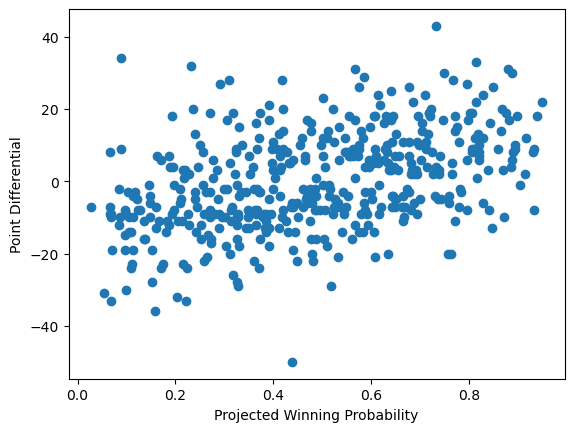

In [117]:
## Generating the scatter plot (x_axis) and the point_diff(y_axis) 
plt.scatter("forecast","point_diff", data = nba_2010)
plt.xlabel("Projected Winning Probability")
plt.ylabel("Point Differential")
plt.show()